### EDA

INTRODUCTION: 
This notebook is the analysis of our columns. The first part is our univariate analysis where we analyse categorical and numerical data separatly. The secont part is our bivariate analysis where we analyse the relationship between our target variable(Rating for our case) and our other columns. Our last step is to make a correlation heatmap to see which of our columns is correlated. 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [33]:
df_clean = pd.read_csv(filepath_or_buffer= "../data/Clean_Dataset.csv") 
df_clean.head()

,Category,Rating,Rating Count,Free,Price,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Entertainment,3.9,68.0,True,0.0,Everyone,False,False,False
1,Lifestyle,0.0,0.0,True,0.0,Everyone,False,False,False
2,Shopping,4.3,918.0,True,0.0,Everyone,True,False,False
3,Finance,5.0,6.0,True,0.0,Everyone,False,False,False
4,Food & Drink,4.3,830.0,True,0.0,Everyone,True,False,False


In [6]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9663 entries, 0 to 9662
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Category          9663 non-null   object 
 1   Rating            9663 non-null   float64
 2   Rating Count      9663 non-null   float64
 3   Free              9663 non-null   bool   
 4   Price             9663 non-null   float64
 5   Content Rating    9663 non-null   object 
 6   Ad Supported      9663 non-null   bool   
 7   In App Purchases  9663 non-null   bool   
 8   Editors Choice    9663 non-null   bool   
dtypes: bool(4), float64(3), object(2)
memory usage: 415.3+ KB


### Step 1: Univariate Analysis

Our target colums is Rating and it is the average rating of an applications. The data type of this column is a float. We are dealing with a regression machine learning problem 
We are analysing our categorical and numerical data to understand them more and also to see how are they distibuted. 

#### Categorical

In [7]:
categorical_df = df_clean.select_dtypes('object').copy()
categorical_df.head()

,Category,Content Rating
0,Entertainment,Everyone
1,Lifestyle,Everyone
2,Shopping,Everyone
3,Finance,Everyone
4,Food & Drink,Everyone


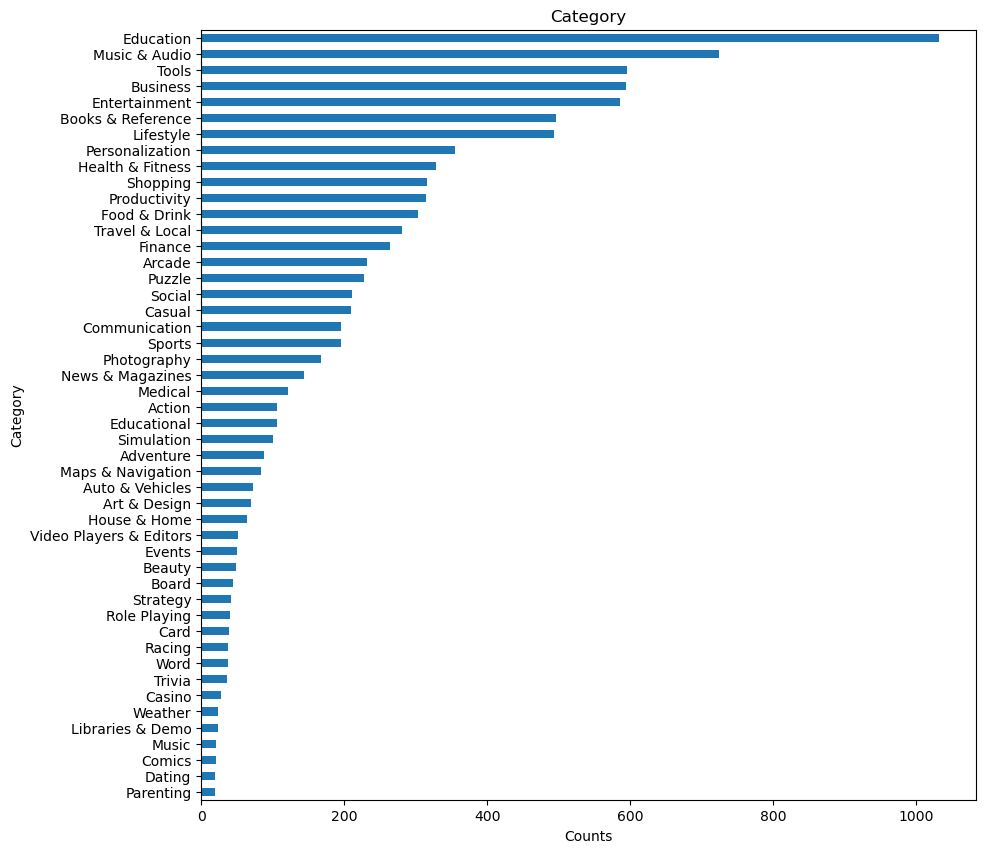

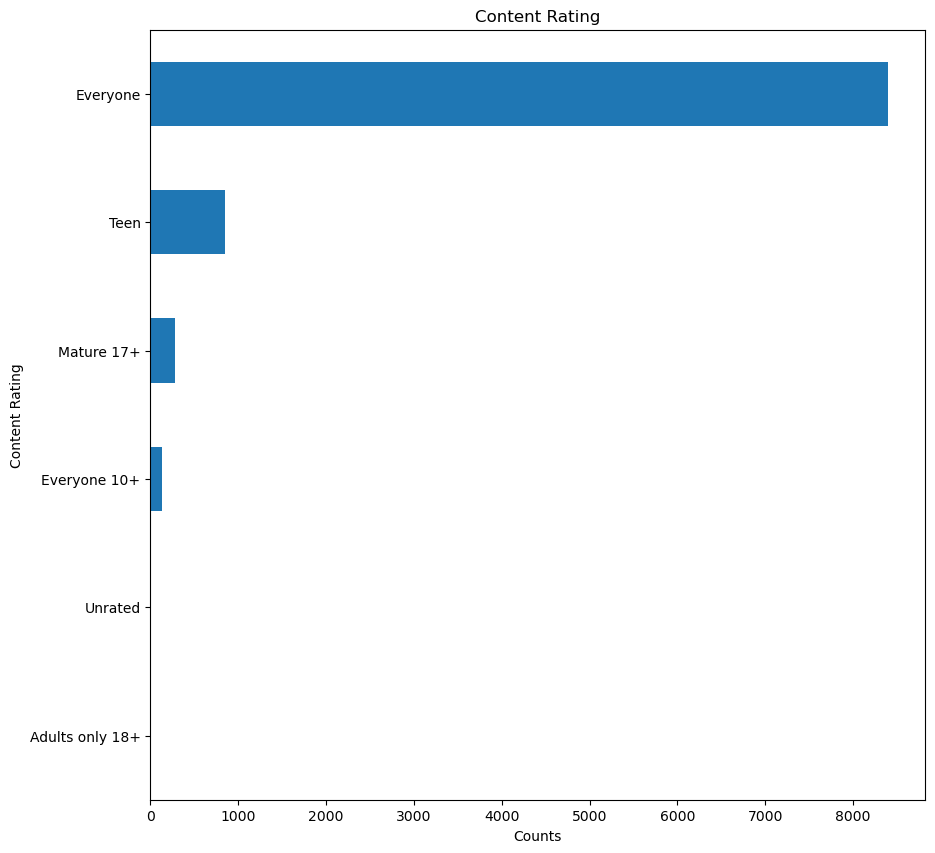

In [8]:
for column in categorical_df.columns:
    plt.figure(figsize=(10,10))
    categorical_df[column].value_counts().sort_values().plot(kind='barh')
    plt.xlabel("Counts")
    plt.title(column)
    plt.show()

We can see that there are lots application on Education, Tools, Music & Audio and Entertainment. There are fewer application on Libraries & Demo, Parenting, Musics and Comics.
Most of the applications is for everyone and there is less application for the other contant rating features. 

In [9]:
boolean_df = df_clean.select_dtypes('bool').copy()
boolean_df.head()

,Free,Ad Supported,In App Purchases,Editors Choice
0,True,False,False,False
1,True,False,False,False
2,True,True,False,False
3,True,False,False,False
4,True,True,False,False


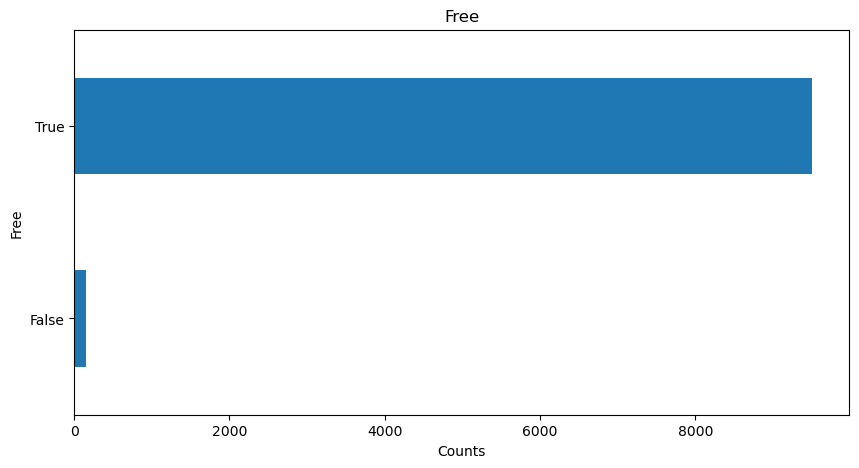

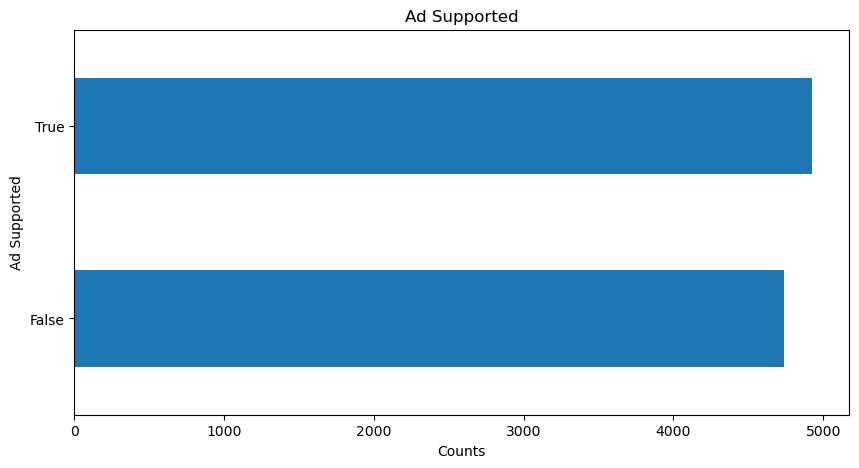

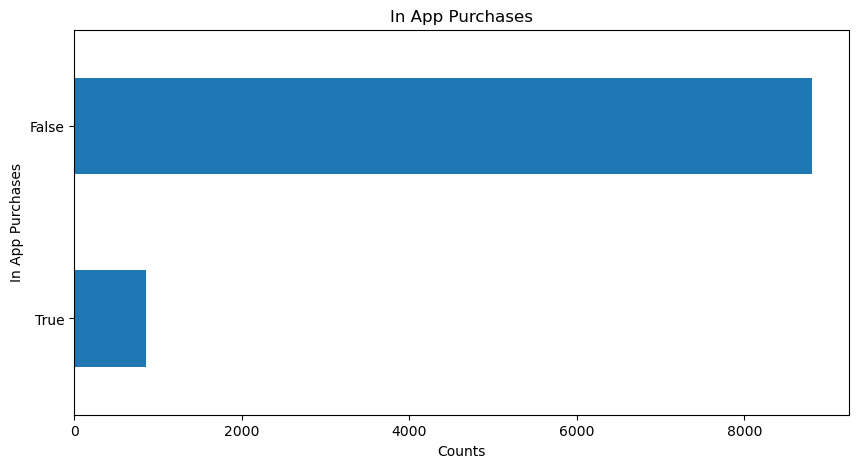

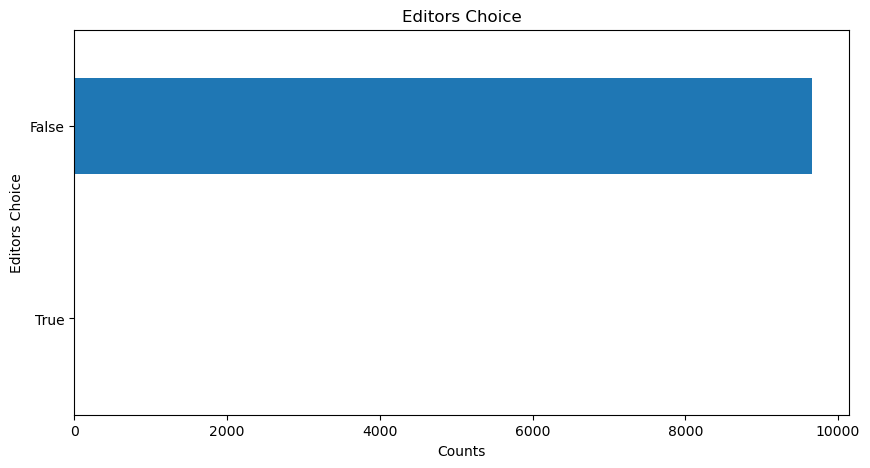

In [10]:
for column in boolean_df.columns:
    plt.figure(figsize=(10,5))
    boolean_df[column].value_counts().sort_values().plot(kind='barh')
    plt.xlabel("Counts")
    plt.title(column)
    plt.show()

There is a bit more of application ad supported compare to the non ad supported but there is not too much difference. 
Few application contain in app purchase but the majority does not have in app purchases 
None of the applications is editor choices. 
The majority of the application are free and only a few portion are paid application. 

#### Numerical 

In [11]:
df_clean.describe()

,Rating,Rating Count,Price
count,9663.000000,9.663000e+03,9663.000000
mean,2.214695,1.423607e+03,0.109652
std,2.110918,2.387508e+04,3.087679
min,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000e+00,0.000000
50%,3.000000,6.000000e+00,0.000000
75%,4.300000,4.000000e+01,0.000000
max,5.000000,1.569485e+06,269.990000


We can see the Rating goes from 0 to 5. Half of the rating in at 3 or less. 25% of rating coresponds to non rated applications. 
We can see that the rating count is from 0 to over 1millions. 50% of application has been at least rated 6 times or less. 25% of rating count coresponds to non rated applications.  
We can see that the price only goes from 0 to 269.99 showing that there is only one priced application.

In [12]:
numeric_df = df_clean.select_dtypes(['float64']).copy()
numeric_df.head()

,Rating,Rating Count,Price
0,3.9,68.0,0.0
1,0.0,0.0,0.0
2,4.3,918.0,0.0
3,5.0,6.0,0.0
4,4.3,830.0,0.0


In [28]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9663 entries, 0 to 9662
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Category          9663 non-null   object 
 1   Rating            9663 non-null   float64
 2   Rating Count      9663 non-null   float64
 3   Free              9663 non-null   bool   
 4   Price             9663 non-null   float64
 5   Content Rating    9663 non-null   object 
 6   Ad Supported      9663 non-null   bool   
 7   In App Purchases  9663 non-null   bool   
 8   Editors Choice    9663 non-null   bool   
dtypes: bool(4), float64(3), object(2)
memory usage: 415.3+ KB


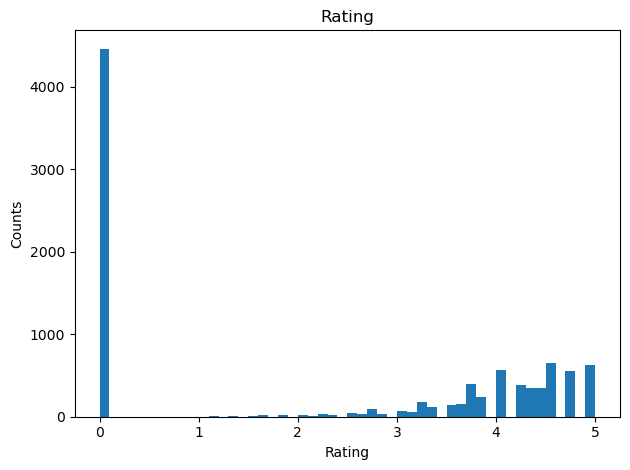

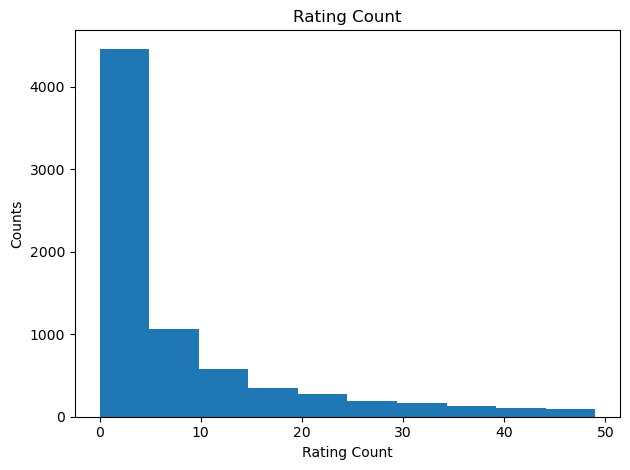

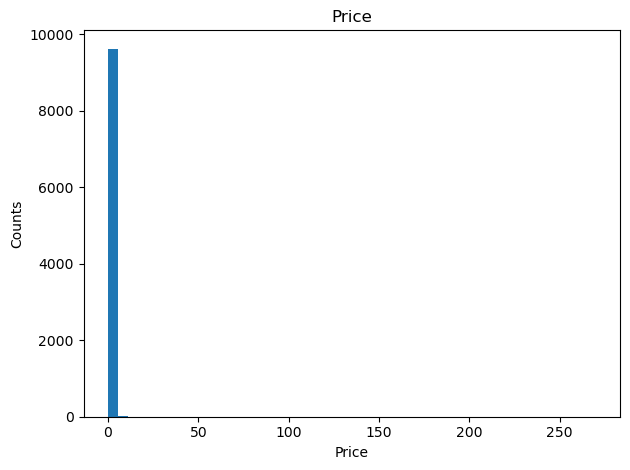

In [32]:
for column in numeric_df:
    plt.figure()
    if column == 'Rating Count':
        df_small = df_clean[df_clean['Rating Count'] < 50]
        plt.hist(df_small['Rating Count'])
    else:
        plt.hist(df_clean[column], bins=50)
    plt.title(column)
    plt.ylabel('Counts')
    plt.xlabel(column)
    
    plt.tight_layout()
    plt.show()

We can see that most of the application are rated 0, meaning that those application are non rated as the minimum rating is 1. 
Most of the application are free. 
The rating count bar chart seems to be very high at 0 showing that lots of application are not rated. 

### Step 2: Bivariate Analysis (target variable = Rating)

Our target variable is Rating, we need to analyse the relationship between this variable and our categorical and numerical values.

#### Categorical 

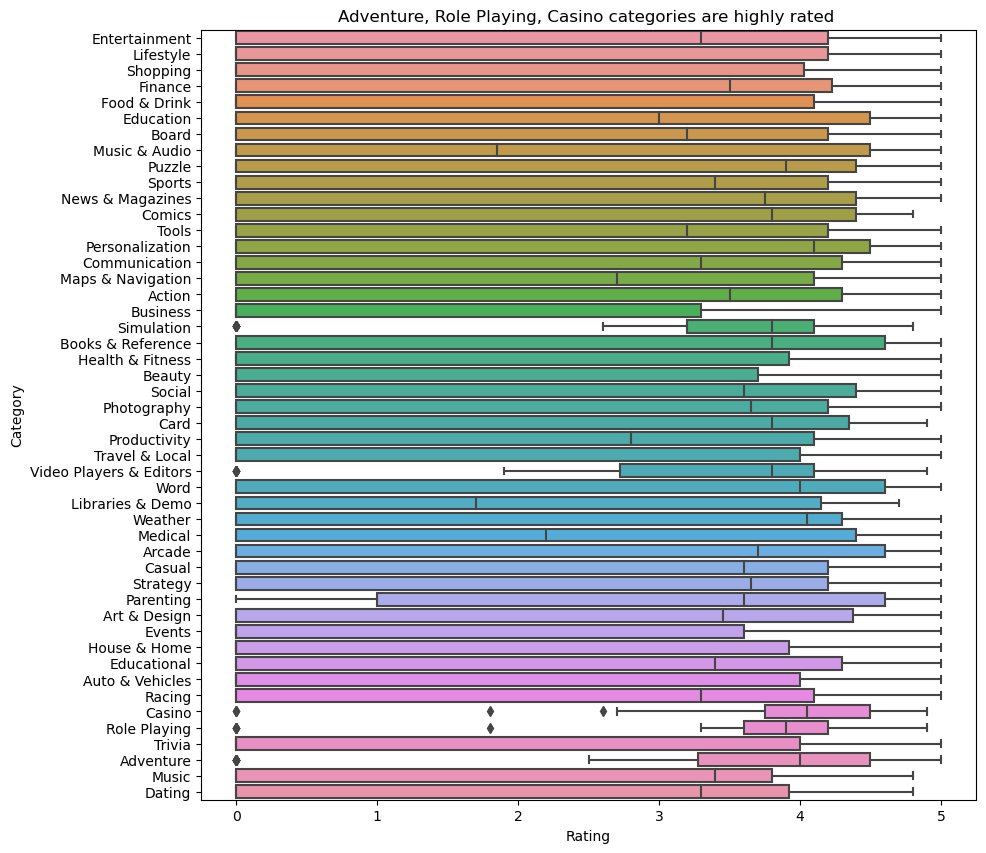

In [34]:
plt.figure(figsize = (10, 10))
sns.boxplot(data = df_clean, x= 'Rating', y= 'Category')
plt.title('Adventure, Role Playing, Casino categories are highly rated ')
plt.show()

We can see that the Categories Adventure, Role Playing, Casino are highly rated and 50% of those application  are rated arrount 4. 
50% of the Music & Audio, Libraries & Demo  and Medical application seems to be rated between 1 and 3. 

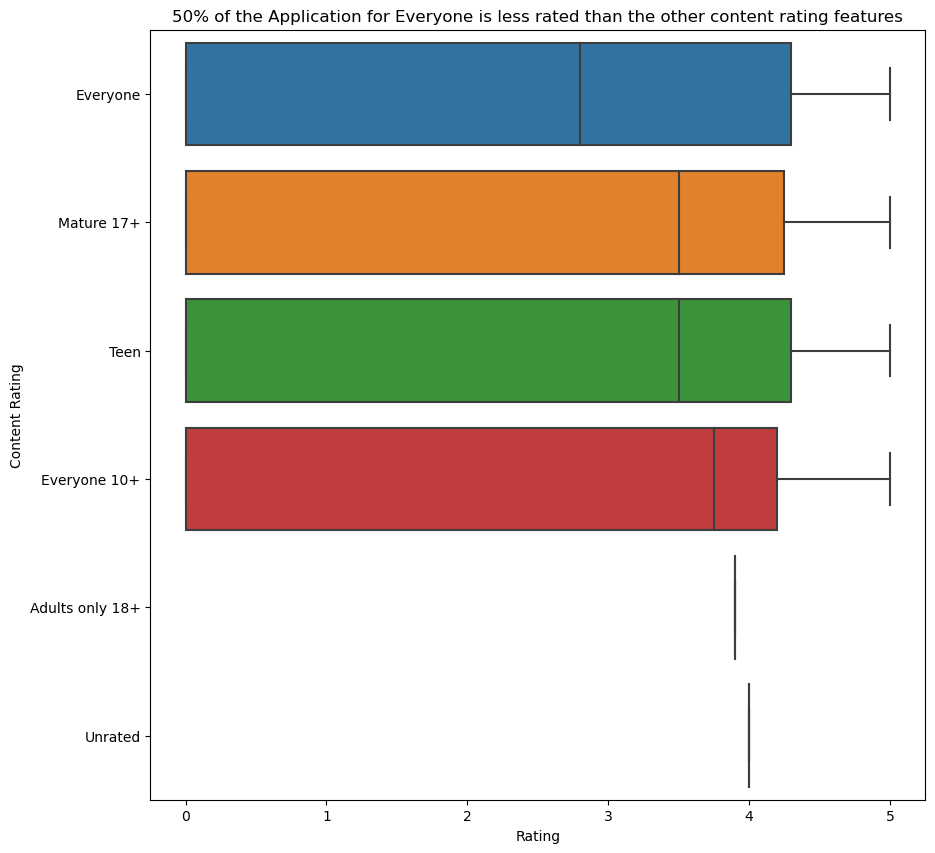

In [35]:
plt.figure(figsize = (10, 10))
sns.boxplot(data = df_clean, x= 'Rating', y= 'Content Rating')
plt.title('50% of the Application for Everyone is less rated than the other content rating features')
plt.show()

We can see that the application for Everyone seems to be rated close to 3 while the other Content Rating are rated above 3 and nearly 4. 
However we can see that Adult only 18+ and Unrated are non existent.

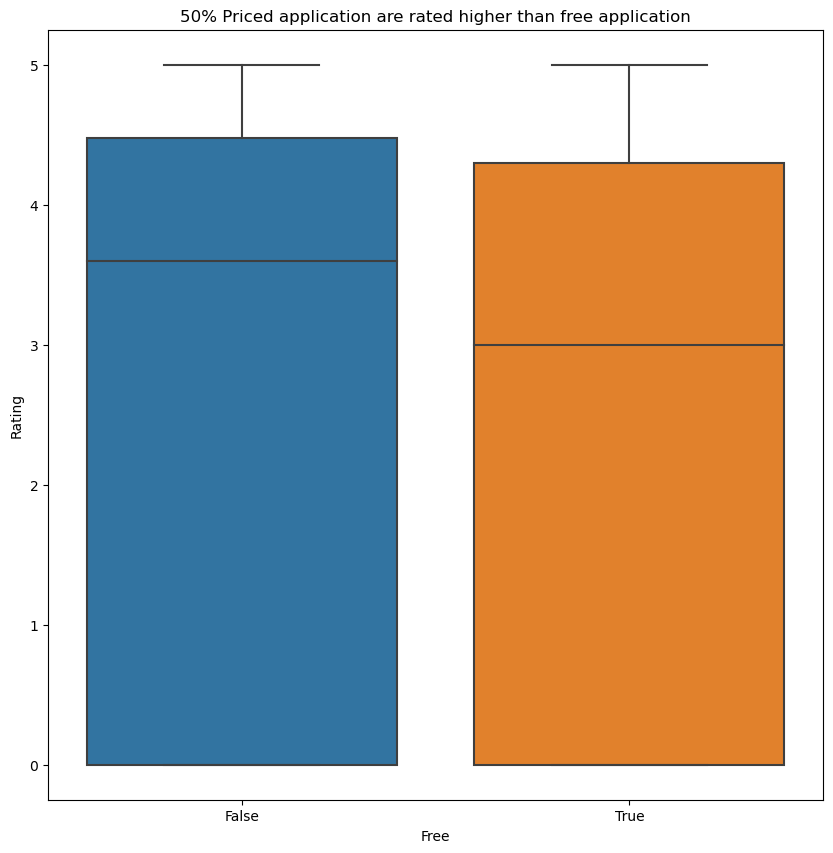

In [36]:
plt.figure(figsize = (10, 10))
sns.boxplot(data = df_clean, y = 'Rating', x= 'Free')
plt.title('50% Priced application are rated higher than free application')
plt.show()

We can see that 50% of the free application are rated 3 while 50% of the paid application are rated 3.5. 
The Free application rated lower than paid application because it might be related to ads. If there is too many ads the application is less enjoyable to use. 

In [17]:
df_clean[df_clean['Ad Supported'] == 0]['Rating'].describe()

count    4737.000000
mean        1.866160
std         2.097144
min         0.000000
25%         0.000000
50%         0.000000
75%         4.200000
max         5.000000
Name: Rating, dtype: float64

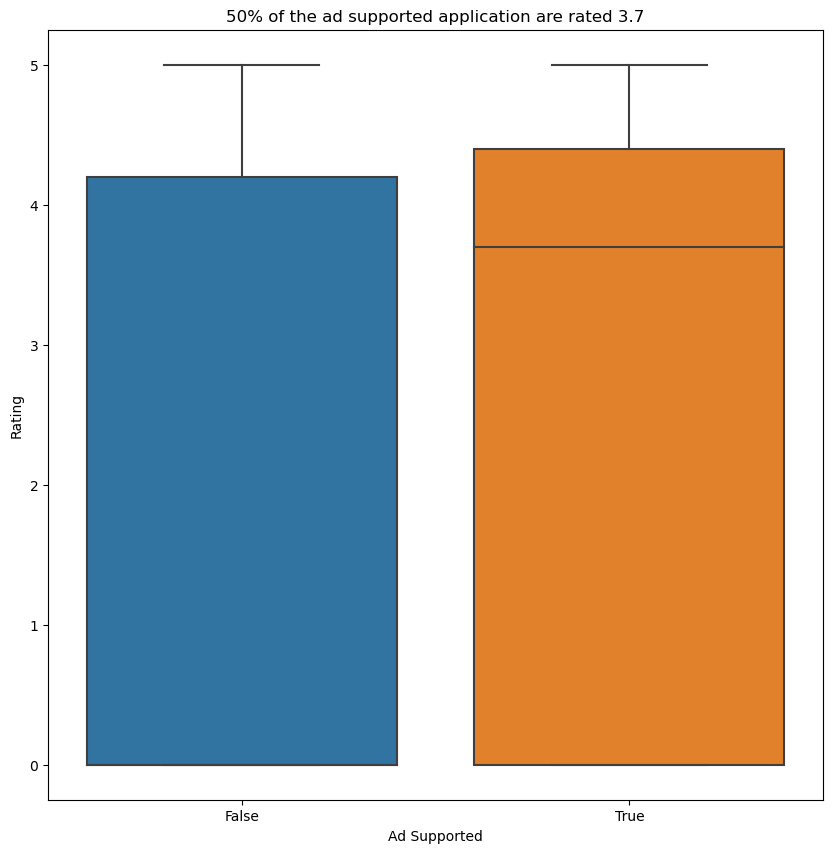

In [37]:
plt.figure(figsize = (10, 10))
sns.boxplot(data = df_clean, y = 'Rating', x= 'Ad Supported')
plt.title('50% of the ad supported application are rated 3.7')
plt.show()

we can see that 50% of ad supported applications seem to be rated 3.7. While the upper range of non ad supported applications are rated 4.2. 
We saw previously that 50% of the free applications are rated lower than non paid applications. In this case it seems to be contradictory as 50% ads supported application are rated higher. There may be some application that does not contain much ads. 

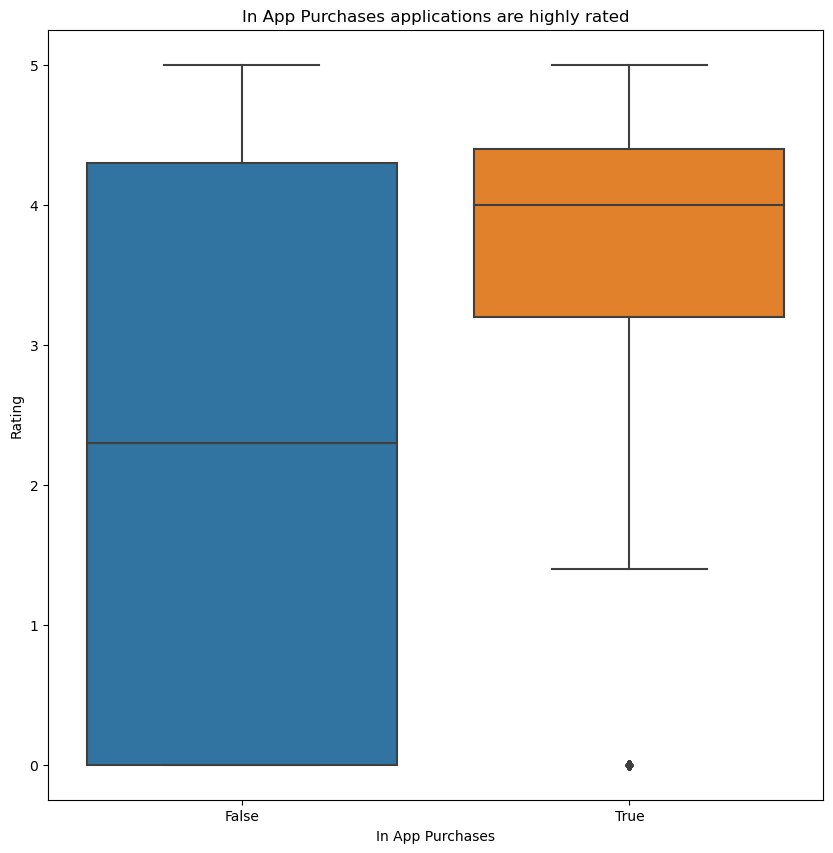

In [25]:
plt.figure(figsize = (10, 10))
sns.boxplot(data = df_clean, y = 'Rating', x= 'In App Purchases')
plt.title('In App Purchases applications are highly rated')
plt.show()

We can see that the in App Purchases application are highly rated while 50% of application that doesnt contain in app purchases are rated approximatively 2.3.

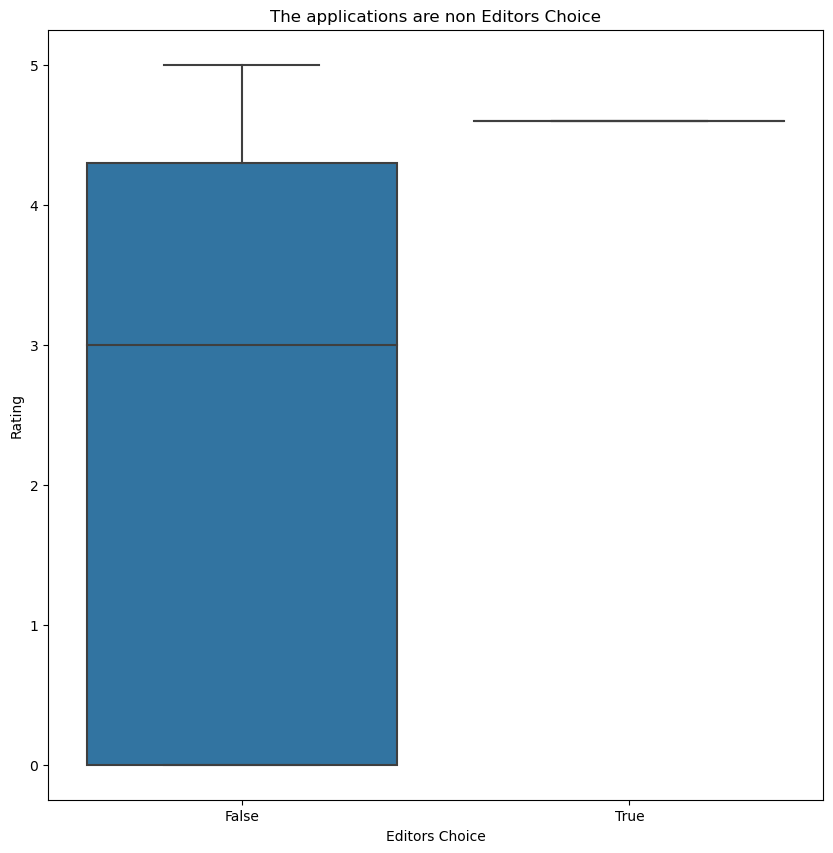

In [38]:
plt.figure(figsize = (10, 10) )
sns.boxplot(data = df_clean, y = 'Rating', x= 'Editors Choice')
plt.title('The applications are non Editors Choice')
plt.show()

We can see non of our application are editors choice and 50% of the non editors choice application are rated 3

#### Numerical

c:\Users\lelon\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


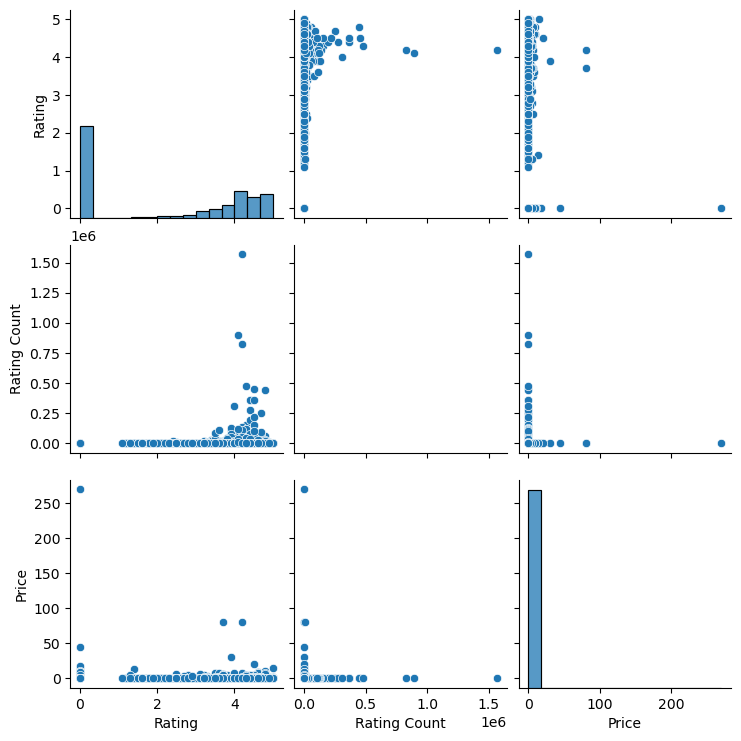

In [21]:
sns.pairplot(df_clean.select_dtypes(include=['int64','float']))

We can see that our columns Rating and Rating Counts seems to have a relationship. It might be because our target variable is the average rating and we need the rating counts to calculate it.

### Step 3: Correlation Heatmap

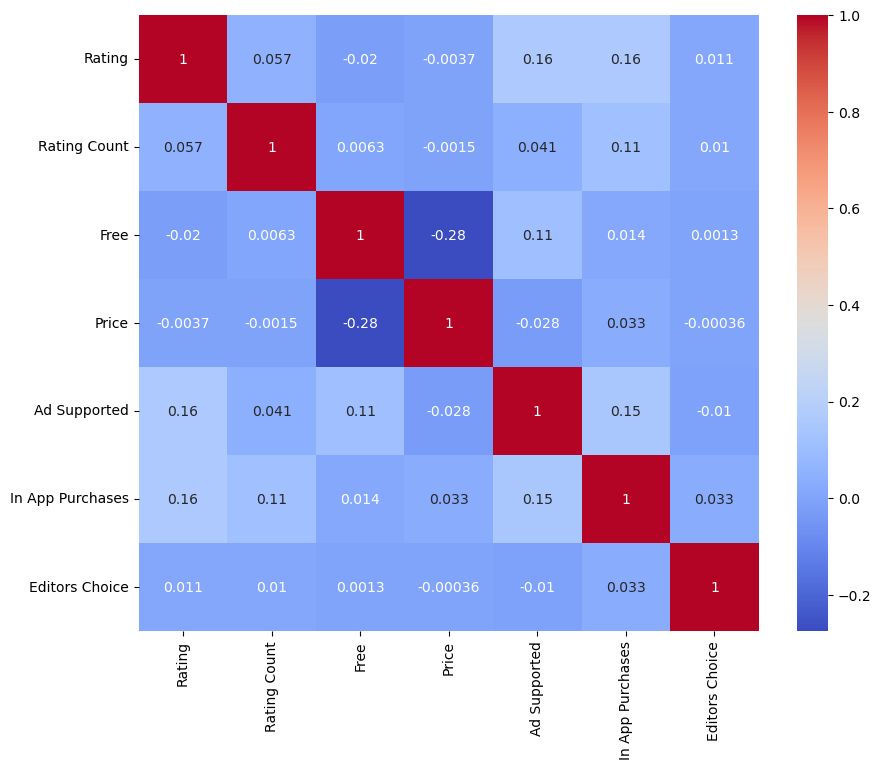

In [22]:
columns = ['Rating', 'Rating Count', 'Free', 'Price', 'Ad Supported', 'In App Purchases', 'Editors Choice']
correlation_matrix = df_clean[columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True)
plt.show()

We can see that our target variable Rating correlation is not really strong with the other columns.

CONCLUSION: We can see that most of the applications are rated around 3 but we have some of the applications that are not rated. For our categorical columns, we can see that that most of the applications are for everyone, free and contains ads. We can see that the application categories Adventure, Role Playing, Casino have higher rating. Application  for everyone seems to be rated lower. We can also see that the free application are rated lower which might be due to ads as most of the free application contain ads and if there is too many ads the application is not really enjoyable to use. 
Using a heatmap, we can see that our target variable are not really correlated witht the other columns. 

